# **Labeling**

# Load Data

In [6]:
import pandas as pd
df=pd.read_csv(r'datapro.csv')

In [7]:
data=pd.DataFrame(df['stemming'])
data.head()

,stemming
0,kayak kopi kenang janji_jiwa
1,lanjut janji_jiwa stay hungry tau
2,hari kopi nya caramel macchiato janji_jiwa
3,janji_jiwa seblak aesthetic
4,banyak engga suka janji_jiwa padahal favorit i...


In [8]:
import re

def preprocess_text(text):
    if isinstance(text, str):
        text = re.sub(r'janji jiwa', 'janji_jiwa', text, flags=re.IGNORECASE)
    return text

data['stemming'] = data['stemming'].apply(preprocess_text)


In [9]:
data.head()

,stemming
0,kayak kopi kenang janji_jiwa
1,lanjut janji_jiwa stay hungry tau
2,hari kopi nya caramel macchiato janji_jiwa
3,janji_jiwa seblak aesthetic
4,banyak engga suka janji_jiwa padahal favorit i...


In [13]:
print(data['stemming'].isnull().sum())  

491


In [16]:
dfa=data.dropna(subset=['stemming'])

print(f'Number of rows after removing NaN in the "stemming" column.: {dfa.shape[0]}')

Number of rows after removing NaN in the "stemming" column.: 13734


In [18]:
print(dfa['stemming'].isnull().sum()) 

0


# Inset Lexicon

In [21]:
import pandas as pd

# Load lexicon (positive and negative)
def load_lexicon(file_path):
    lexicon = pd.read_csv(file_path, sep='\t', header=0, names=["word", "weight"])
    lexicon['weight'] = pd.to_numeric(lexicon['weight'], errors='coerce').fillna(0)
    lexicon_dict = dict(zip(lexicon['word'].str.lower(), lexicon['weight']))
    return lexicon_dict

# count sentiment score
def label_sentiment(text, positive_lexicon, negative_lexicon):
    words = text.split()  
    sentiment_score = 0
    word_weights = []  
    
    for word in words:
        word = word.lower()
        if word in positive_lexicon:
            weight = positive_lexicon[word]
        elif word in negative_lexicon:
            weight = negative_lexicon[word]
        else:
            weight = 0
        sentiment_score += weight
        word_weights.append((weight))

    # define label sentiment
    if sentiment_score > 0:
        label = 'positive'
    elif sentiment_score < 0:
        label = 'negative'
    else:
        label = 'neutral'  
    
    return label, sentiment_score, word_weights

positive_lexicon = load_lexicon('positive.tsv')  
negative_lexicon = load_lexicon('negative.tsv')  

df = pd.DataFrame(dfa)

df[['label', 'total_weight', 'word_weights']] = dfa['stemming'].apply(
    lambda x: pd.Series(label_sentiment(x, positive_lexicon, negative_lexicon))
)

In [22]:
df.head(20)

,stemming,label,total_weight,word_weights
0,kayak kopi kenang janji_jiwa,neutral,0,"[-3, 0, 3, 0]"
1,lanjut janji_jiwa stay hungry tau,positive,4,"[2, 0, 0, 0, 2]"
2,hari kopi nya caramel macchiato janji_jiwa,neutral,0,"[0, 0, 0, 0, 0, 0]"
3,janji_jiwa seblak aesthetic,neutral,0,"[0, 0, 0]"
4,banyak engga suka janji_jiwa padahal favorit i...,positive,19,"[3, 0, 3, 0, 0, 5, 0, 0, 0, 3, 0, 0, 0, 5, 0]"
5,halo warga magelang shoes and care open recrui...,neutral,0,"[1, 0, 0, 0, 0, 2, -3, 0]"
6,cari store manager shoe technician kirim cv la...,neutral,0,"[-3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0,..."
7,janji_jiwa,neutral,0,[0]
8,kopi susu sahabat janji_jiwa gila enak banget ...,positive,25,"[0, 0, 4, 0, 3, 5, 1, 0, 5, 1, 0, 3, 3]"
9,habis beberes kamar baru sadar nyata kumpul to...,positive,10,"[3, 0, 0, 0, 2, 4, 0, 0, 0, 3, 1, -3]"


## Count Label

In [24]:
sentiment_counts = df['label'].value_counts()
print(sentiment_counts)

label
positive    8858
neutral     2628
negative    2248
Name: count, dtype: int64


#### Remove Label Neutral
Removing the neutral label to avoid ambiguity in sentiment analysis, ensuring a clearer distinction between positive and negative opinions.

In [26]:
df = df[df['label'] != 'neutral']

In [27]:
# Hitung jumlah sentimen positif dan negatif
sentiment_counts = df['label'].value_counts()

# Tampilkan hasil
print(sentiment_counts)

label
positive    8858
negative    2248
Name: count, dtype: int64


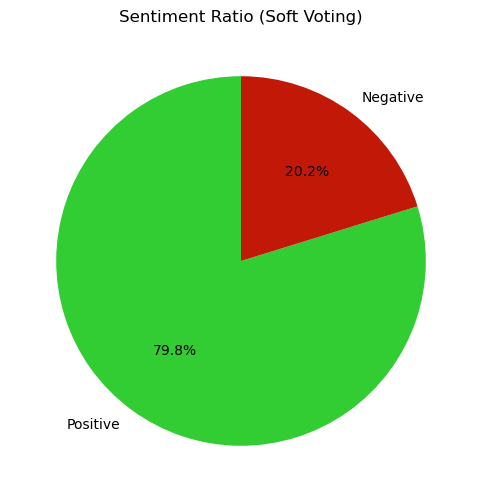

In [28]:
import matplotlib.pyplot as plt

labels = ['Positive', 'Negative']
sizes = [8862, 2246]
colors = ['#32CD32', '#C21807']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Sentiment Ratio (Soft Voting)')
plt.show()


In [29]:
# check NaN value
df = df.dropna(subset=['label'])
print(df['label'].isna().sum())

0


In [30]:
!pip install wordcloud

In [ ]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Get the default stopwords list from Sastrawi
stopword_factory = StopWordRemoverFactory()
stopwords = stopword_factory.get_stop_words()

# A list of custom words to be given a higher weight.
custom_words = ['toast', 'promo', 'voucher', 'diskon', 'coklat', 'susu']
positif_words = Counter()

for index, row in df.iterrows():
    sentence = row['stemming']
    label = row['label']
    
    words = word_tokenize(sentence)
    
    words = [word for word in words if word not in stopwords]
    
    if label == 'positive':  
        for word in words:
            if word in custom_words:
                positif_words[word] += 15 
            else:
                positif_words[word] += 1  

wordcloud_positif = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
).generate_from_frequencies(positif_words)

# Plot WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positif, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize  
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

stopword_factory = StopWordRemoverFactory()
stopwords = stopword_factory.get_stop_words()

custom_words = ['americano', 'rasa', 'kopi', 'kualitas', 'air', 'gaenak', 'cair']
negative_words = Counter()

for index, row in df.iterrows():
    sentence = row['stemming']
    label = row['label']
    
    words = word_tokenize(sentence)
    words = [word for word in words if word not in stopwords]
    
    if label == 'negative':  
        for word in words:
            if word in custom_words:
                negative_words[word] += 15  
            else:
                negative_words[word] += 1  

wordcloud_negative = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
).generate_from_frequencies(negative_words)

# Plot WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.show()


### Save file 

In [ ]:
df = pd.DataFrame(df)
df.to_csv("datalabel.csv", index=False)

# **Feature Extraction**

# TF-IDF

In [178]:
import pandas as pd

dfb=pd.read_csv(r'datalabel.csv')

In [180]:
sentiment_counts = dfb['label'].value_counts()
print(sentiment_counts)

label
positive    8858
negative    2248
Name: count, dtype: int64


In [184]:
df = dfb.dropna(subset=['stemming'])

In [186]:
print(df['label'].isnull().sum()) 

0


### Create 500 Feature

In [189]:
df1=df

In [191]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TF-IDF Vectorizer tanpa stopword karena sudah melalui preprocessing
tfidf_vectorizer = TfidfVectorizer(max_features=500)  # Stopword dihilangkan di tahap preprocessing

# Melakukan fit_transform pada data teks yang telah melalui preprocessing (stopwords dan stemming)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['stemming'])

# Mengonversi hasil TF-IDF menjadi DataFrame agar lebih mudah dibaca
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Gabungkan hasil TF-IDF ke dalam DataFrame asli
data_tfidf1 = pd.concat([df1, tfidf_df], axis=1)

In [193]:
data_tfidf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11106 entries, 0 to 11105
Columns: 504 entries, stemming to zonauang
dtypes: float64(500), int64(1), object(3)
memory usage: 42.7+ MB


In [195]:
df1 = pd.DataFrame(data_tfidf1)
df1.to_csv("500feature.csv", index=False)

### Create 5000 Feature

In [50]:
df3=df

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TF-IDF Vectorizer tanpa stopword karena sudah melalui preprocessing
tfidf_vectorizer = TfidfVectorizer(max_features=500)  # Stopword dihilangkan di tahap preprocessing

# Melakukan fit_transform pada data teks yang telah melalui preprocessing (stopwords dan stemming)
tfidf_matrix = tfidf_vectorizer.fit_transform(df3['stemming'])

# Mengonversi hasil TF-IDF menjadi DataFrame agar lebih mudah dibaca
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Gabungkan hasil TF-IDF ke dalam DataFrame asli
data_tfidf2 = pd.concat([df3, tfidf_df], axis=1)

In [52]:
data_tfidf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11108 entries, 0 to 11107
Columns: 504 entries, stemming to zonauang
dtypes: float64(500), int64(1), object(3)
memory usage: 42.7+ MB


In [53]:
df2 = pd.DataFrame(data_tfidf2)
df2.to_csv("5000feature.csv", index=False)